<a href="https://colab.research.google.com/github/uoahy-6uoas/HG-Machine/blob/main/hg5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

keywords = 결정트리, 불순도, 정보이득, 가지치기, 특성 중요도

In [1]:
#와인 분류하기
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
#head func
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
#describe func
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
#info func
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [6]:
import numpy as np
from sklearn.model_selection import  train_test_split

In [7]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2) # 데이터의 20%만 테스트세트로 지정함 default=25%

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
lr.score(train_scaled,train_target), lr.score(test_scaled,test_target)

(0.7854531460457956, 0.7684615384615384)

In [10]:
lr.coef_ , lr.intercept_
#로지스틱 회귀는 성능이 좋지 못하다

(array([[ 0.5561061 ,  1.66459703, -0.7319947 ]]), array([1.81368968]))

**결정트리**
> 결정 트리decision tree는 분류와 회귀 문제에 널리 사용하는 모델입니다. 기본적으로 결정 트리는 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습합니다. *텐서플로우 블로그*

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
dt.score(train_scaled,train_target), dt.score(test_scaled, test_target)

(0.9974985568597268, 0.87)

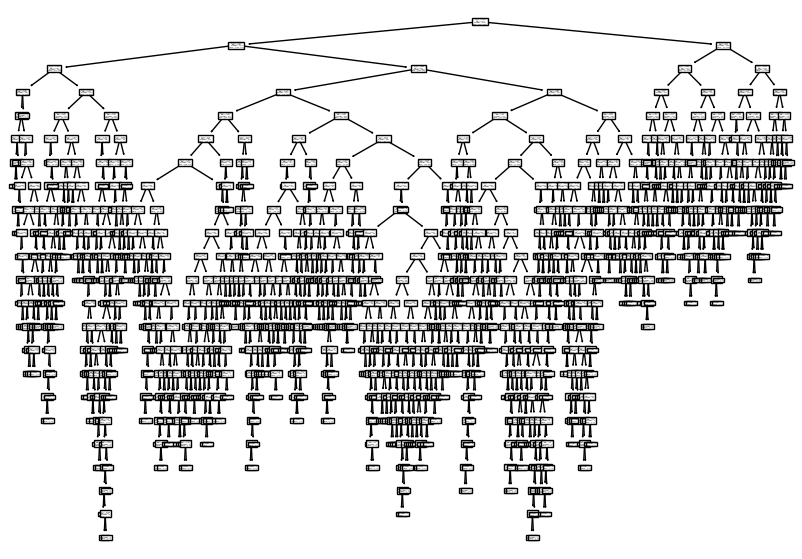

In [12]:
#plot_tree로 트리를 볼 수 있음
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7)) # figsize(가로길이,세로길이) : 나타날 그림의 크기를 정해줌
plot_tree(dt)
plt.show()
#맨 위의 노드를 루트노드, 맨 아래노드를 리프노드

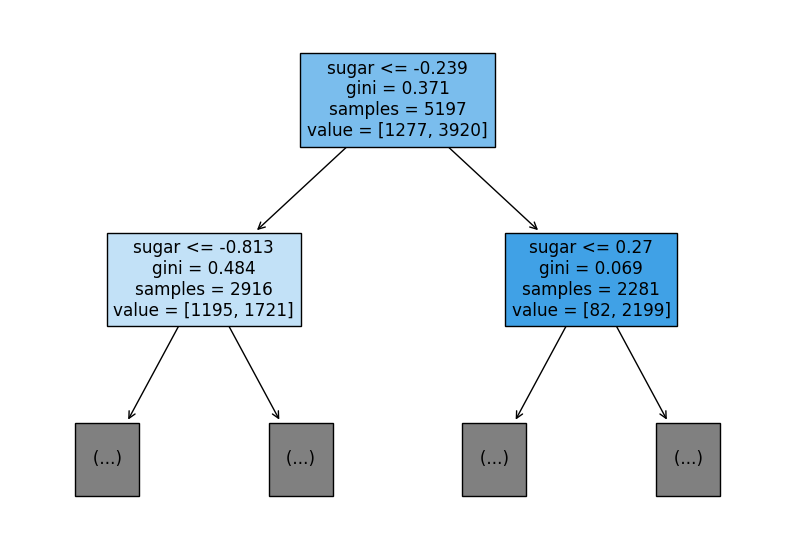

In [13]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','sugar','pH']) # filled=True : value 리스트의 한쪽이 커지면 점점 진해짐
plt.show()

```
test_term = is sugar <= 4.15?
if sugar <= 4.15: goto left = negative class = 0
else: goto right = positive class = 1
```

**gini = 불순도**
> $Gini\_Impurity ≡ 1 - (Negative Class Ratio^2 + PositiveClassRatio^2)$<br>

good : 0 <= gini <= 0.5 bad <br>
결정트리모델은 부모노드와 자식노드의 불순도 차이(정보이득)가 크도록 성장시킴<br>


**inforamtion gain = 정보이득**<br>
> $Information\_Gain ≡ Parent\_Gini - $<br>
$(Num\_LeftNode/Num_ParentNode) × Gini\_LeftNode -$<br>
$(Num\_RightNode/Num_ParentNode) × Gini\_RightNode $

불순도에는 기본값인 지니불순도외에 엔트로피불순도가 있음
$-NegativeClassRatio × log_2\{NegativeClassRatio\} - PositiveClassRatio × log_2\{PositiveClassRatio\}$ <br>
지금은 큰 차이가 없음<br>
위의 트리는 제한없이 자라났기 때문에 과대적합된 것

**가지치기 = 트리에 제한을 주는 방법**
1. 트리의 최대 깊이를 지정한다.

In [14]:
dt = DecisionTreeClassifier(max_depth=3) #3줄만 써라
dt.fit(train_input, train_target)
dt.score(train_input, train_target), dt.score(test_input,test_target)

(0.8447181065999615, 0.8469230769230769)

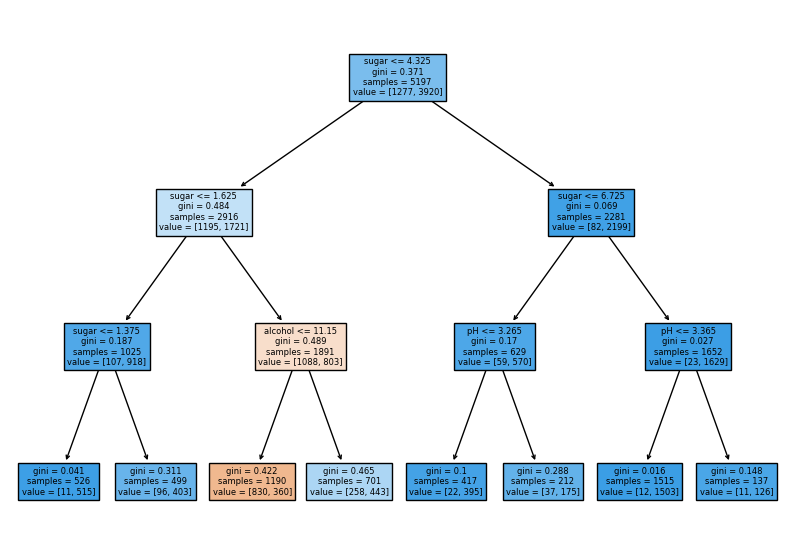

In [15]:
plt.figure(figsize=(10,7))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH']) #figure_name을 왜 지정하지??
plt.show()
#표준화 전처리 과정은 dt에 영향을 미치지 않는다..

**특성 중요도**<br>
노드의 깊이가 얕은(루트에 가까운) 곳에서 사용한 지표가 중요도가 높은 지표 = sugar가 특성 중요도가 높다.<br>
특성중요도 = 각 노드의 정보이득*전체샘플에 대한 비율 -> 특성별로 더함 ... 계산방법이 와닿지는 않는다 찾아보자!

In [16]:
dt.feature_importances_ #특성중요도 표시 [alcohol, sugar, pH]

array([0.12358786, 0.86933354, 0.0070786 ])

* 확인문제
1. 결정트리의 불순도에 대한 설명, 지니불순도는 클래스의 비율을 제곱하여 모두 더한 다음 1에서 뺍니다, 엔트리피 불순도는 클래스 비율과 클래스 비율에 밑이 2인 로그를 적용한 값을 곳해서 모두 더한 후 음수로 바꾸어 계산합니다.
2. 결정트리에서 계산한 특성중요도가 저장되어 있는 속성은 feature_importances\_
3. min_impurity\_decrease=0.0005를 사용해 가지치기 해보자..<br>
(정보이득*(노드샘플수)/(전체샘플수) <= 0.0005면 더 이상 분할 하지 않음)

0.8803155666730806 0.8584615384615385


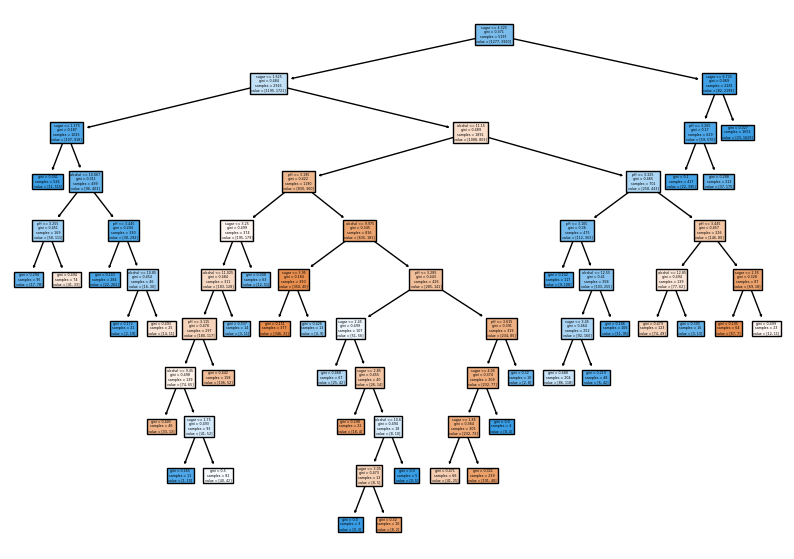

In [17]:
dt = DecisionTreeClassifier(min_impurity_decrease = 0.0005)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target), dt.score(test_input,test_target))
plt.figure(figsize=(10,7))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()